# Comparison of KNN and Classification Trees on Continuous Datasets
In this notebook I'll demonstrate my implementations so far whilst comparing their performance on complete datasets comprised of continuous datasets.
In the cell below, I'll import my implementations thus far

In [1]:
import numpy as np
import sys
sys.path.append("..")
from models.knn import KNearestNeighbours # KNN implementation
from models.classification_tree import ClassificationTree #Tree implementation
from data_processing.cross_validation import k_folds_accuracy_score, leave_one_out_score #Model Eval
from data_processing.train_test_split import train_test_split #Splitting training and testing
from data_processing.preprocessing import MinMaxScaler #Basic Normalisation

Now we'll start with the iris dataset and load this dataset into training and testing. We'll initially try and tune our hyperparameters to find the best values for this dataset - Finding the best k for KNN and the best maximum depth for the tree.

### Loading Iris

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, seed=4567)
print("Training set size:",X_train_iris.shape)
print("Test set size:",X_test_iris.shape)

Training set size: (113, 4)
Test set size: (37, 4)


## Tuning the Hyperparameters
### Finding optimal K for KNN

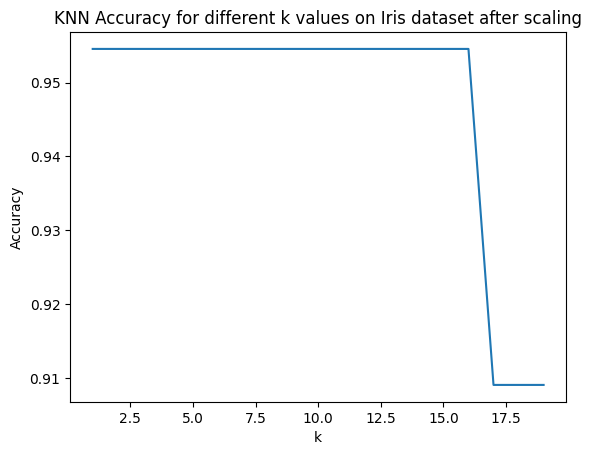

In [3]:
import matplotlib.pyplot as plt
X_train, X_val, y_train, y_val = train_test_split(X_train_iris, y_train_iris, test_size=0.2, seed=234)

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

accuracies = []

# Looping from k=1 to k=20
for k in range(1, 20):
    knn = KNearestNeighbours(k)
    knn.fit(scaled_X_train, y_train)
    y_pred_val = knn.predict(scaled_X_val)
    accuracy = np.mean(y_val == y_pred_val)
    accuracies.append(accuracy)

# Plotting the results
plt.plot(range(1, 20), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values on Iris dataset after scaling')


# Show the plot
plt.show()



KNN has strong performance throughout. We could select K right before the accuracy decreases, but 17 seems quite high for such a simple and small dataset, let's stick to k=5

### Finding optimal tree depth
We reuse the scaled datasets from the KNN tuning process and use them here for our tree tuning

1 : actual depth = 1 accuracy: 0.5909090909090909
2 : actual depth = 2 accuracy: 0.9090909090909091
3 : actual depth = 3 accuracy: 0.9090909090909091
4 : actual depth = 4 accuracy: 0.9090909090909091
5 : actual depth = 4 accuracy: 0.9090909090909091
6 : actual depth = 4 accuracy: 0.9090909090909091
7 : actual depth = 4 accuracy: 0.9090909090909091
8 : actual depth = 4 accuracy: 0.9090909090909091
9 : actual depth = 4 accuracy: 0.9090909090909091
10 : actual depth = 4 accuracy: 0.9090909090909091


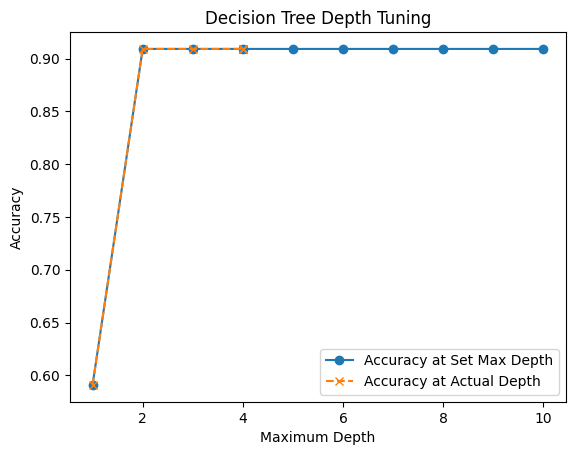

In [4]:

accuracies = []
actual_maximum_depths = []

# Looping from depth=1 to depth=10
for d in range(1, 11):
    tree_tune = ClassificationTree(max_depth=d)
    tree_tune.fit(scaled_X_train, y_train)
    y_pred_val = tree_tune.predict(scaled_X_val)
    accuracy = np.mean(y_val == y_pred_val)
    accuracies.append(accuracy)
    actual_maximum_depths.append(tree_tune.get_depth())

    print(d, ": actual depth =", tree_tune.get_depth(), "accuracy:", accuracy)

# Create a line plot for set maximum depths
plt.plot(range(1, 11), accuracies, label='Accuracy at Set Max Depth', marker='o')

# Create a line plot for actual depths achieved
plt.plot(actual_maximum_depths, accuracies, label='Accuracy at Actual Depth', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')

# Add a legend
plt.legend()

# Show the plot
plt.show()



This graph and the printed statements show that the tree hits its stopping criteria when it reaches a depth of 4, and hits its most accurate by 2.

We'll use k of 5 for KNN moving forwards and we'll set a maximum depth of 3.
We'll now reshuffle the dataset.

## Model Validation
We'll now perform Cross-Validation on these models upon the iris dataset

In [5]:
%%timeit -r 1 -n 1
X, y = iris.data, iris.target
knn = KNearestNeighbours(k=5)
tree = ClassificationTree(max_depth=3)

print("5-Folds - knn -iris - accuracy", k_folds_accuracy_score(knn, X, y, k=5, seed=2345))
print("10-Folds - knn - iris - accuracy", k_folds_accuracy_score(knn, X, y, k=10, seed=2345))
print("Leave-One-Out - knn - iris - accuracy", leave_one_out_score(knn, X, y, seed=2345))
print("")
print("5-Folds - tree -iris - accuracy", k_folds_accuracy_score(tree, X, y, k=5, seed=2345))
print("10-Folds - tree - iris - accuracy", k_folds_accuracy_score(tree, X, y, k=10, seed=2345))
print("Leave-One-Out - tree - iris - accuracy", leave_one_out_score(tree, X, y, seed=2345))


5-Folds - knn -iris - accuracy 0.9666666666666668
10-Folds - knn - iris - accuracy 0.9666666666666666
Leave-One-Out - knn - iris - accuracy 0.9666666666666667

5-Folds - tree -iris - accuracy 0.9266666666666667
10-Folds - tree - iris - accuracy 0.9400000000000001
Leave-One-Out - tree - iris - accuracy 0.94
885 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Here we see that KNN performs slightly better and overall both models perform quite well. It's worth noting that for now, LOOCV takes quite a while to execute on the tree.

Just for demonstration purposes, I'll print an example of the tree on some fitted data. 

In [6]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, seed=12345)
tree_toprint = ClassificationTree(max_depth=3)
tree_toprint.fit(X_train_iris,y_train_iris)
pred_toprint = tree_toprint.predict(X_test_iris)
acc_toprint = np.mean(pred_toprint == y_test_iris)
print("accuracy = ",acc_toprint)
tree_toprint.print_tree(feature_names = iris.feature_names)


accuracy =  0.918918918918919
petal length (cm) <= 3.0
Left:
|   --> Class: 0.0
Right:
|   petal width (cm) <= 1.7
|   Left:
|   |   petal length (cm) <= 5.0
|   |   Left:
|   |   |   --> Class: 1.0
|   |   Right:
|   |   |   --> Class: 2.0
|   Right:
|   |   petal length (cm) <= 4.9
|   |   Left:
|   |   |   --> Class: 1.0
|   |   Right:
|   |   |   --> Class: 2.0


Above, we can see an example of a constructed tree with maximum depth set to 3. This tree has a 91.8% accuracy rate on predictions with this split of the iris dataset.

We can count the layers of depth with the vertical dashed lines shown.

## Iris Confusion Matrix
We'll take the tree plotted above and place it in a confusion matrix. We'll fit a corresponding KNN model on the same dataset and compare their performance that way.  
We'll import the confusion_matrix display utility from SKLearn

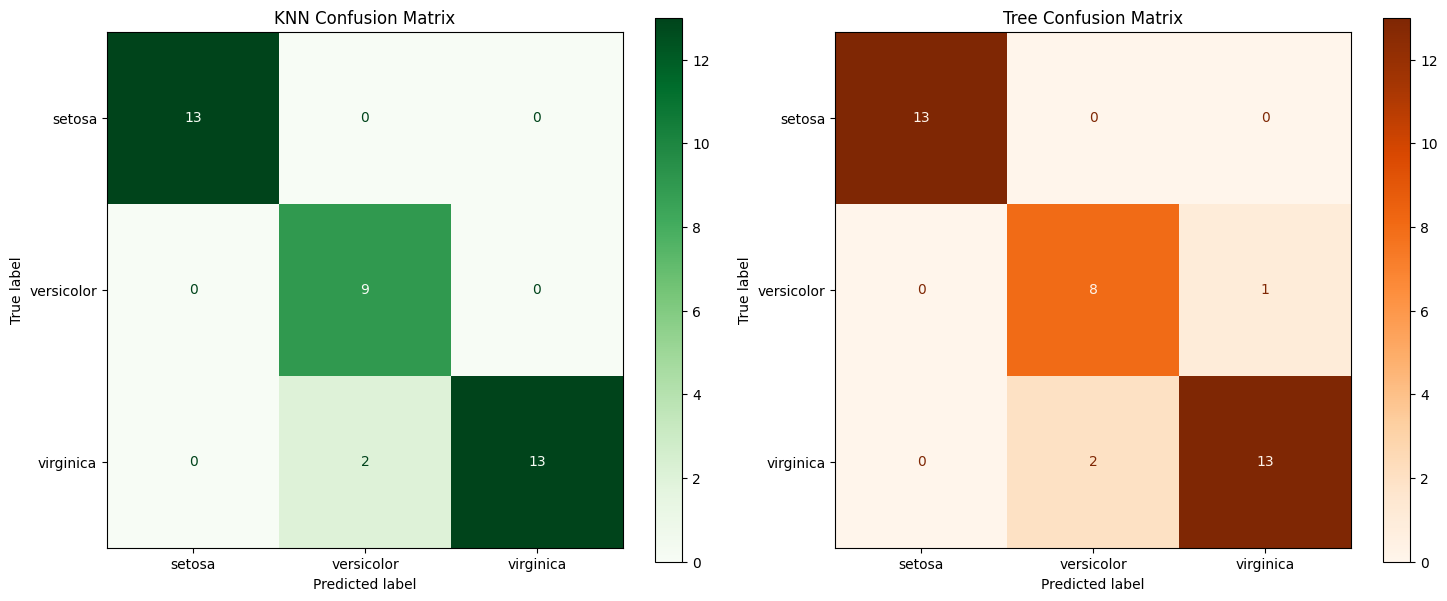

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tree_cm = confusion_matrix(y_test_iris, pred_toprint)

knn_toprint = KNearestNeighbours(k=3)
knn_toprint.fit(X_train_iris,y_train_iris)
knnpred_toprint = knn_toprint.predict(X_test_iris)

knn_cm = confusion_matrix(y_test_iris, knnpred_toprint)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot KNN confusion matrix
ConfusionMatrixDisplay(knn_cm, display_labels=iris.target_names).plot(cmap='Greens', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')

# Plot CART tree confusion matrix
ConfusionMatrixDisplay(tree_cm, display_labels=iris.target_names).plot(cmap='Oranges', ax=axes[1])
axes[1].set_title('Tree Confusion Matrix')

plt.tight_layout()
plt.show()


In this instance, we find that KNN predicts with two mismatches. Tree has made three false predictions, as was suggested earlier with the 91.8% accuracy score.
Confusion matrices allow us to visualise how well a model performs quite intuitively, letting us see which classes the classifier has had issues with.

## Loading Ionosphere

We'll load another dataset from the UCI repository here, this time from a text file. This dataset has many more features. We're classifying values from radar signals to classify if the signal is "good" or bad"

In [8]:
iono = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",")
X_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=np.arange(34))
y_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=34, dtype="int")
X_train_io, X_test_io, y_train_io, y_test_io = train_test_split(X_io, y_io, seed=2108)
print("Training set size (and features): ", X_train_io.shape)
print("Test set size (and features): ", X_test_io.shape)

Training set size (and features):  (264, 34)
Test set size (and features):  (87, 34)


## Tuning the Hyperparameters
### Finding optimal K for KNN

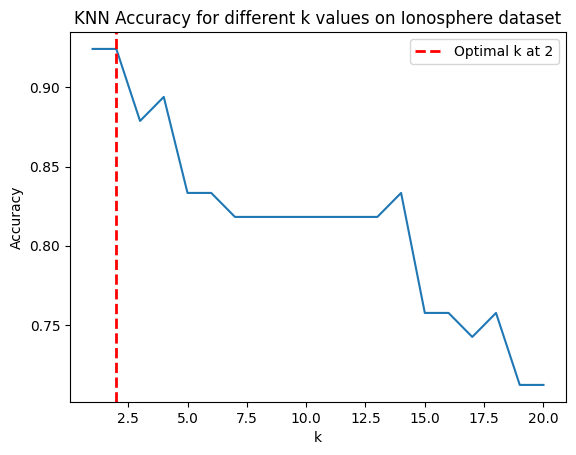

The best value of k for the Ionosphere dataset is: 2


In [9]:
X_train_io, X_test_io, y_train_io, y_test_io = train_test_split(X_io, y_io, seed=2108)
X_train_io, X_val_io, y_train_io, y_val_io = train_test_split(X_train_io, y_train_io, seed=3456)

# Initialize and apply MinMaxScaler
scaler_io = MinMaxScaler()
scaled_X_train_io = scaler_io.fit_transform(X_train_io)
scaled_X_val_io = scaler_io.transform(X_val_io)

accuracies_io = []

# Looping from k=1 to k=20 for the Ionosphere dataset
for k in range(1, 21):
    knn_io = KNearestNeighbours(k)
    knn_io.fit(scaled_X_train_io, y_train_io)
    y_pred_val_io = knn_io.predict(scaled_X_val_io)
    accuracy_io = np.mean(y_val_io == y_pred_val_io)
    accuracies_io.append(accuracy_io)

# Plotting the results
plt.plot(range(1, 21), accuracies_io)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values on Ionosphere dataset')

# Finding the best k value
max_accuracy_io = max(accuracies_io)
best_ks = [k for k, accuracy in enumerate(accuracies_io, start=1) if accuracy == max_accuracy_io]
best_k_io = max(best_ks)

# Add a vertical line at the best k value
plt.axvline(x=best_k_io, color='red', linestyle='--', linewidth=2, label=f'Optimal k at {best_k_io}')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

print(f"The best value of k for the Ionosphere dataset is: {best_k_io}")

This time, I graphed where the best value of K could be found, we'll use 2 here. The accuracies are significantly lower than what we found with iris. Likely due to how many more features are here.

### Finding optimal tree depth


1 : actual depth = 1 accuracy: 0.803030303030303
2 : actual depth = 2 accuracy: 0.8636363636363636
3 : actual depth = 3 accuracy: 0.8636363636363636
4 : actual depth = 4 accuracy: 0.8787878787878788
5 : actual depth = 5 accuracy: 0.8787878787878788
6 : actual depth = 6 accuracy: 0.8636363636363636
7 : actual depth = 7 accuracy: 0.8636363636363636
8 : actual depth = 8 accuracy: 0.8636363636363636
9 : actual depth = 9 accuracy: 0.8636363636363636
10 : actual depth = 9 accuracy: 0.8636363636363636


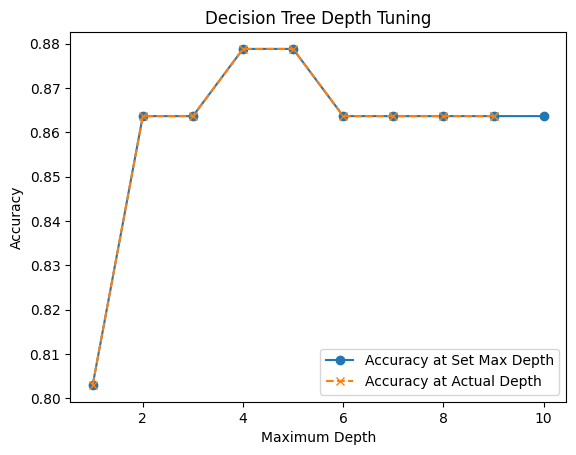

The best depth is: 4


In [10]:

accuracies = []
actual_maximum_depths = []

# Looping from depth=1 to depth=10
for d in range(1, 11):
    tree_tune_io = ClassificationTree(max_depth=d)
    tree_tune_io.fit(scaled_X_train_io, y_train_io)
    y_pred_val_io = tree_tune_io.predict(scaled_X_val_io)
    accuracy_io = np.mean(y_val_io == y_pred_val_io)
    accuracies.append(accuracy_io)
    actual_maximum_depths.append(tree_tune_io.get_depth())

    print(d, ": actual depth =", tree_tune_io.get_depth(), "accuracy:", accuracy_io)

# Create a line plot for set maximum depths
plt.plot(range(1, 11), accuracies, label='Accuracy at Set Max Depth', marker='o')

# Create a line plot for actual depths achieved
plt.plot(actual_maximum_depths, accuracies, label='Accuracy at Actual Depth', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Find the best depth
best_depth = accuracies.index(max(accuracies)) + 1  # +1 because depth starts from 1
print(f"The best depth is: {best_depth}")

Again, significantly lower accuracy than iris. We'll use a depth of 4 here. 

### Cross-Validation

In [11]:

X, y = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=np.arange(34)), np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=34, dtype="int")
knn = KNearestNeighbours(k=2)
tree = ClassificationTree(max_depth=4)

print("5-Folds - knn -ionosphere - accuracy", k_folds_accuracy_score(knn, X, y, k=5, seed=2345))
print("10-Folds - knn - ionosphere - accuracy", k_folds_accuracy_score(knn, X, y, k=10, seed=2345))
print("Leave-One-Out - knn - ionosphere - accuracy", leave_one_out_score(knn, X, y, seed=2345))
print("")
print("5-Folds - tree -ionosphere - accuracy", k_folds_accuracy_score(tree, X, y, k=5, seed=2345))
print("10-Folds - tree - ionosphere - accuracy", k_folds_accuracy_score(tree, X, y, k=10, seed=2345))

5-Folds - knn -ionosphere - accuracy 0.8688933601609656
10-Folds - knn - ionosphere - accuracy 0.8660317460317462
Leave-One-Out - knn - ionosphere - accuracy 0.8660968660968661

5-Folds - tree -ionosphere - accuracy 0.8888933601609658
10-Folds - tree - ionosphere - accuracy 0.8662698412698413


In [12]:
%%timeit -r 1 -n 1
print("Leave-One-Out - tree - ionosphere - accuracy", leave_one_out_score(tree, X, y, seed=2345))

Leave-One-Out - tree - ionosphere - accuracy 0.8490028490028491
4min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


This time, we find that both classifiers have lower accuracies than on the iris dataset, and that the tree manages to fare generally better with this dataset overall. This could be due to KNN struggling with the number of features and ionosphere's relatively noisy data.

Leave-One-Out took *five minutes* to run on my implementation of the tree. The tree building process is likely very slow with this many features for the tree to traverse. This will need to be optimised.

 ## Loading Banknote Authentication
 Finally, we'll load a third larger dataset from UCI, called Banknote authentication. 

In [13]:
# Load the banknote dataset
banknote_data = np.genfromtxt('../datasets/data_banknote_authentication.txt', delimiter=',')

# Split into features and labels
X_bn = banknote_data[:, :-1]  # All rows, all columns except the last
y_bn = banknote_data[:, -1]   # All rows, only the last column

In [14]:
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bn, y_bn, seed=2108)
print("Training set size (and features): ", X_train_bn.shape)
print("Test set size (and features): ", X_test_bn.shape)

Training set size (and features):  (1029, 4)
Test set size (and features):  (343, 4)


## Tuning the Hyperparameters
### Finding optimal K for KNN

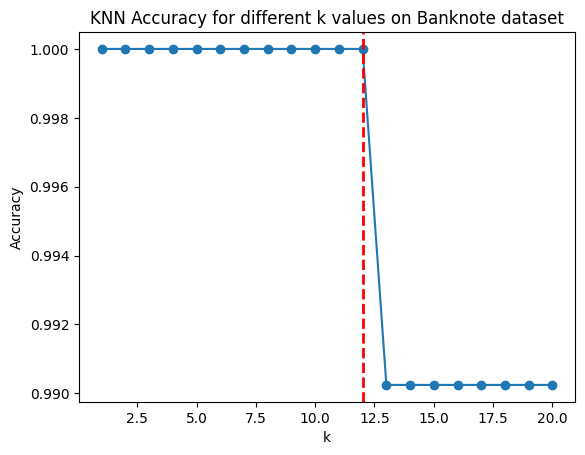

The best value of k for the Banknote Authentication dataset is: 12


In [15]:

import matplotlib.pyplot as plt

X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bn, y_bn, seed=2108)

# Split the training data into training and validation sets
X_train_bn, X_val_bn, y_train_bn, y_val_bn = train_test_split(X_train_bn, y_train_bn, test_size=0.2, seed=2108)

# Initialize the MinMaxScaler
scaler_bn = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and validation data
scaled_X_train_bn = scaler_bn.fit_transform(X_train_bn)
scaled_X_val_bn = scaler_bn.transform(X_val_bn)

# List to store the accuracies for different values of k
accuracies_bn = []

# Loop over various values of k
for k in range(1, 21):
    knn_bn = KNearestNeighbours(k)
    knn_bn.fit(scaled_X_train_bn, y_train_bn)
    y_pred_val_bn = knn_bn.predict(scaled_X_val_bn)
    accuracy_bn = np.mean(y_pred_val_bn == y_val_bn)
    accuracies_bn.append(accuracy_bn)

# Plotting the accuracy for different values of k
plt.plot(range(1, 21), accuracies_bn, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values on Banknote dataset')

# Highlight the best k value
max_accuracy_bn = max(accuracies_bn)
best_ks = [k for k, accuracy in enumerate(accuracies_bn, start=1) if accuracy == max_accuracy_bn]
best_k_bn = max(best_ks)

plt.axvline(x=best_k_bn, color='red', linestyle='--', linewidth=2, label=f'Optimal k at {best_k_bn}')


# Show the plot
plt.show()

print(f"The best value of k for the Banknote Authentication dataset is: {best_k_bn}")


KNN performs very well on this dataset again! We'll use a value of 12 for k in Cross-Validation.

### Finding optimal tree depth


1 : actual depth = 1 accuracy: 0.8439024390243902
2 : actual depth = 2 accuracy: 0.9024390243902439
3 : actual depth = 3 accuracy: 0.926829268292683
4 : actual depth = 4 accuracy: 0.9658536585365853
5 : actual depth = 5 accuracy: 0.9804878048780488
6 : actual depth = 6 accuracy: 0.9804878048780488
7 : actual depth = 7 accuracy: 0.9804878048780488
8 : actual depth = 7 accuracy: 0.9804878048780488
9 : actual depth = 7 accuracy: 0.9804878048780488
10 : actual depth = 7 accuracy: 0.9804878048780488


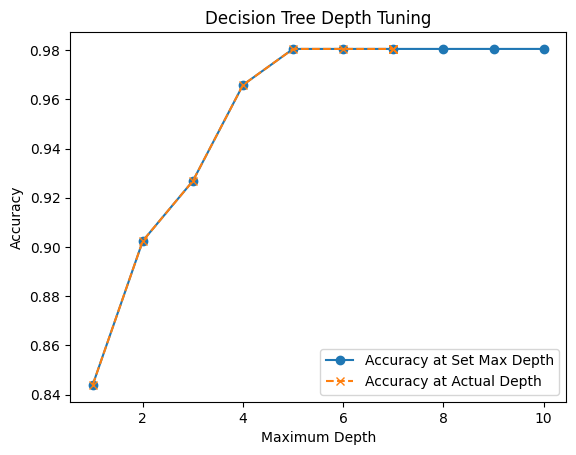

The best depth is: 5


In [16]:

accuracies = []
actual_maximum_depths = []

# Looping from depth=1 to depth=10
for d in range(1, 11):
    tree_tune_bn = ClassificationTree(max_depth=d)
    tree_tune_bn.fit(scaled_X_train_bn, y_train_bn)
    y_pred_val_bn = tree_tune_bn.predict(scaled_X_val_bn)
    accuracy_bn = np.mean(y_val_bn == y_pred_val_bn)
    accuracies.append(accuracy_bn)
    actual_maximum_depths.append(tree_tune_bn.get_depth())

    print(d, ": actual depth =", tree_tune_bn.get_depth(), "accuracy:", accuracy_bn)

# Create a line plot for set maximum depths
plt.plot(range(1, 11), accuracies, label='Accuracy at Set Max Depth', marker='o')

# Create a line plot for actual depths achieved
plt.plot(actual_maximum_depths, accuracies, label='Accuracy at Actual Depth', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Find the best depth
best_depth = accuracies.index(max(accuracies)) + 1  # +1 because depth starts from 1
print(f"The best depth is: {best_depth}")

Adding depth to the tree shows improvements in accuracy for this dataset up to the depth of 7. We'll use a depth of 5 as suggested.

In [17]:

banknote_data = np.genfromtxt('../datasets/data_banknote_authentication.txt', delimiter=',')
X, y = banknote_data[:, :-1], banknote_data[:, -1]   # All rows, only the last column
knn = KNearestNeighbours(k=12)
tree = ClassificationTree(max_depth=7)

print("5-Folds - knn -banknote - accuracy", k_folds_accuracy_score(knn, X, y, k=5, seed=3456))
print("10-Folds - knn - banknote - accuracy", k_folds_accuracy_score(knn, X, y, k=10, seed=3456))
print("Leave-One-Out - knn - banknote - accuracy", leave_one_out_score(knn, X, y, seed=3456))
print("")
print("5-Folds - tree - banknote - accuracy", k_folds_accuracy_score(tree, X, y, k=5, seed=3456))
print("10-Folds - tree - banknote - accuracy", k_folds_accuracy_score(tree, X, y, k=10, seed=3456))


5-Folds - knn -banknote - accuracy 1.0
10-Folds - knn - banknote - accuracy 1.0
Leave-One-Out - knn - banknote - accuracy 1.0

5-Folds - tree - banknote - accuracy 0.9810589230931978
10-Folds - tree - banknote - accuracy 0.9759859265871974


In [18]:
%%timeit -r 1 -n 1
print("Leave-One-Out - tree - banknote - accuracy", leave_one_out_score(tree, X, y, seed=3456))

Leave-One-Out - tree - banknote - accuracy 0.9803206997084548
36min 16s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Here we can see that KNN performs remarkably well again, on a larger dataset but few features. 
The tree retrieves good values too, though these results suggest that the tree algorithm could be improved significantly.
Leave-One-Out takes five minutes again for the tree algorithm, I'll need to make significant optimisations within the tree algorithm's splitting process.